In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds 
import numpy as np 
from tensorflow import keras

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

train_data, test_data = imdb["train"], imdb["test"]

training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

for s,l in train_data:
  training_sentences.append(str(s.numpy))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy))
  testing_labels.append(l.numpy())

training_label_final = np.array(training_labels)
testing_label_final = np.array(testing_labels)


vocab_size = 10000
max_length = 120
embedding = 16
trunc_type = "post"
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(training_sentences)
print(sequences)
padding = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
print(padding)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]
)

model.compile(
    loss="binary_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

model.summary()
num_epochs=10

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)

model.fit(
    padding,
    training_label_final, 
    epochs = num_epochs,
    validation_data = (testing_padded, testing_label_final)
)



e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)


reverse_word_index = tokenizer.index_word


import io 

out_v = io.open("vecs.tsv", "w", encoding="utf-8") 
out_m = io.open("meta.tsv", "w", encoding="utf-8") 
for num in range(1, vocab_size):

  word = reverse_word_index[num]
  embedding = weights[num]
  out_m.write(word+"\n")
  out_v.write("\t".join([str(i) for i in embedding])+"\n")

out_v.close()
out_m.close()






In [ ]:
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [ ]:
model.summary()

<h1>Sarcasm Classifications</h1>

In [4]:
#Datasets
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-04-18 14:04:50--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2022-04-18 14:04:50 (72.2 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds 
import numpy as np 
from tensorflow import keras
import json 

with open("sarcasm.json", "r") as f:

  datastore = json.load(f)


training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16
trunc_type = "post"
oov_tok = "<OOV>"

sentences = []
labels = []

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

tokenizers = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizers.fit_on_texts(training_sentences)
sequences = tokenizers.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizers.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)


model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss = "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

num_epochs = 30

history = model.fit(padded,
          training_labels,
          epochs=num_epochs,
          validation_data = (testing_padded, testing_labels)
          )


Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.5625 - accuracy: 0.7011 - val_loss: 0.3954 - val_accuracy: 0.8366
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3127 - accuracy: 0.8748 - val_loss: 0.3429 - val_accuracy: 0.8529
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 0.2352 - accuracy: 0.9075 - val_loss: 0.3457 - val_accuracy: 0.8553
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1906 - accuracy: 0.9259 - val_loss: 0.3578 - val_accuracy: 0.8536
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1580 - accuracy: 0.9433 - val_loss: 0.3820 - val_accuracy: 0.8530
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1346 - accuracy: 0.9509 - val_loss: 0.4256 - val_accuracy: 0.8419
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1148 - accuracy: 0.9608 - val_loss: 0.4492 - val_accuracy: 0.8441
Epoch 

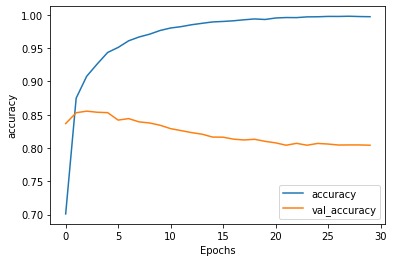

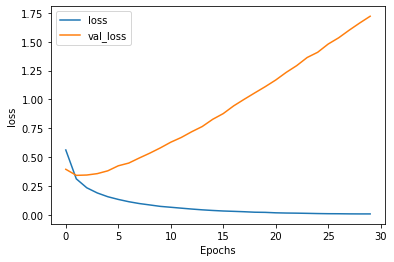

In [8]:
import matplotlib.pyplot as plt 

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds 
import numpy as np 
from tensorflow import keras
import json 

with open("sarcasm.json", "r") as f:

  datastore = json.load(f)


training_size = 20000
vocab_size = 1000
max_length = 16
embedding_dim = 32
trunc_type = "post"
oov_tok = "<OOV>"

sentences = []
labels = []

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

tokenizers = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizers.fit_on_texts(training_sentences)
sequences = tokenizers.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizers.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type)


model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss = "binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

num_epochs = 30

history = model.fit(padded,
          training_labels,
          epochs=num_epochs,
          validation_data = (testing_padded, testing_labels)
          )


Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 0.5039 - accuracy: 0.7480 - val_loss: 0.4127 - val_accuracy: 0.8091
Epoch 2/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3764 - accuracy: 0.8285 - val_loss: 0.3990 - val_accuracy: 0.8153
Epoch 3/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3633 - accuracy: 0.8342 - val_loss: 0.4016 - val_accuracy: 0.8125
Epoch 4/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3584 - accuracy: 0.8379 - val_loss: 0.4042 - val_accuracy: 0.8140
Epoch 5/30
625/625 [==============================] - 2s 2ms/step - loss: 0.3559 - accuracy: 0.8374 - val_loss: 0.4012 - val_accuracy: 0.8146
Epoch 6/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3508 - accuracy: 0.8406 - val_loss: 0.3980 - val_accuracy: 0.8167
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.3448 - accuracy: 0.8421 - val_loss: 0.3947 - val_accuracy: 0.8161
Epoch 

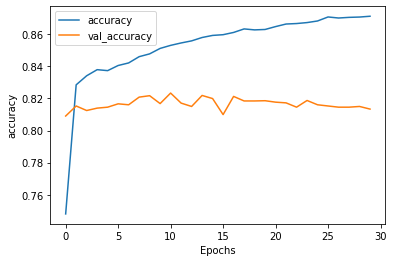

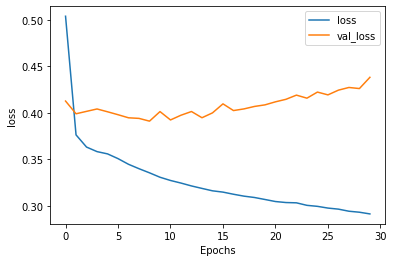

In [10]:
import matplotlib.pyplot as plt 

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")

In [13]:
reverse_word_index = tokenizers.index_word 

e = model.layers[0]
weigths = e.get_weights()[0]
print(weigths.shape)

import io 

out_v = io.open("vecs.tsv", "w", encoding="utf-8")
out_m = io.open("meta.tsv", "w", encoding="utf-8")

for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embedding = weigths[word_num]
  out_m.write(word+"\n")
  out_v.write("\t".join([str(i) for i in embedding])+"\n")


out_v.close()
out_m.close()

(1000, 32)


In [14]:
try:
  from google.colab import files 
except ImportError:
  pass

else:
  files.download("vecs.tsv")
  files.download("meta.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#https://github.com/tensorflow/datasets/tree/master/docs/catalog
#https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder

In [ ]:
#https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C3/W2/ungraded_labs/C3_W2_Lab_3_imdb_subwords.ipynb